In [300]:
import numpy as np
from skimage import io 

In [301]:
import os
train_directory = "./img/grey/"

# Getting the data

In [302]:
def images(image_directory):
    return [image_directory+image for image in os.listdir(image_directory)]

images(train_directory)

['./img/grey/kfc.1.jpg',
 './img/grey/kfc.10.jpg',
 './img/grey/kfc.11.jpg',
 './img/grey/kfc.12.jpg',
 './img/grey/kfc.13.jpg',
 './img/grey/kfc.14.jpg',
 './img/grey/kfc.15.jpg',
 './img/grey/kfc.16.jpg',
 './img/grey/kfc.17.jpg',
 './img/grey/kfc.18.jpg',
 './img/grey/kfc.19.jpg',
 './img/grey/kfc.2.jpg',
 './img/grey/kfc.20.jpg',
 './img/grey/kfc.3.jpg',
 './img/grey/kfc.4.jpg',
 './img/grey/kfc.5.jpg',
 './img/grey/kfc.6.jpg',
 './img/grey/kfc.7.jpg',
 './img/grey/kfc.8.jpg',
 './img/grey/kfc.9.jpg',
 './img/grey/mcd.1.jpg',
 './img/grey/mcd.10.jpg',
 './img/grey/mcd.11.jpg',
 './img/grey/mcd.12.jpg',
 './img/grey/mcd.13.jpg',
 './img/grey/mcd.14.jpg',
 './img/grey/mcd.15.jpg',
 './img/grey/mcd.16.jpg',
 './img/grey/mcd.2.jpg',
 './img/grey/mcd.3.jpg',
 './img/grey/mcd.4.jpg',
 './img/grey/mcd.5.jpg',
 './img/grey/mcd.6.jpg',
 './img/grey/mcd.7.jpg',
 './img/grey/mcd.8.jpg',
 './img/grey/mcd.9.jpg',
 './img/grey/sub.1.jpg',
 './img/grey/sub.10.jpg',
 './img/grey/sub.11.jpg',
 './i

In [303]:
train_image_names = images(train_directory)

# Extracting labels

In [304]:
# Function to extract labels
def extract_labels(file_names):
    '''Create labels from file names: kfc = 0 and mcd = 1 and sub = 2'''
    
    # Create empty vector of length = no. of files, filled with zeros 
    n = len(file_names)
    y = np.zeros(n, dtype = np.uint8)
    
    # Enumerate gives index
    for i, filename in enumerate(file_names):
        
        # If 'kfc' string is in file name assign '0'
        if 'kfc' in str(filename):
            y[i] = 0
        elif 'mcd' in str(filename):
            y[i] = 1
        else :
            y[i] = 2
    return y
     

extract_labels(train_image_names)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=uint8)

In [305]:
y = extract_labels(train_image_names)

# Save labels: np.save(file or string, array)
np.save('y', y)

In [306]:
from PIL import Image


In [307]:
def img_to_matrix(filename):
        
    '''
    takes a filename and turns it into a numpy array of RGB pixels
    '''
    img = Image.open(filename)
    # img = Image.fromarray(filename)
    img = list(img.getdata())
    img = np.asarray(img)
    return img

In [308]:
data = []
for i in images(train_directory):
    img = img_to_matrix(i)
    data.append(img)
    
data = np.array(data)
data.shape

(53, 50000)

In [309]:
np.savetxt("./img/train.txt", data)

In [310]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image

In [311]:
X_train = np.loadtxt('./img/train.txt')

In [312]:
print("Shape of training set: {}".format(X_train.shape))

Shape of training set: (53, 50000)


In [313]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')

H = 100
W = 500


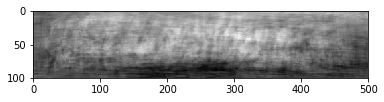

In [314]:
mean_image = np.mean(X_train, axis=0)

plt.imshow(np.reshape(mean_image,[H,W]), cmap = plt.get_cmap("gray"))
plt.show()

# Reducing dimensionality using PCA

In [315]:
from sklearn.decomposition import PCA
n_components = 40

In [316]:
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

In [317]:
pca_result = pca.transform(X_train)

print(X_train.shape)
print(pca_result.shape)
print(y.shape)

x_train= X_train.copy() #for autoML
Y_train= y.copy

(53, 50000)
(53, 40)
(53,)


(array([ 22.,   6.,   4.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.0051866 ,  0.01159281,  0.01799902,  0.02440524,  0.03081145,
         0.03721766,  0.04362387,  0.05003009,  0.0564363 ,  0.06284251,
         0.06924873,  0.07565494,  0.08206115,  0.08846737,  0.09487358,
         0.10127979,  0.10768601,  0.11409222,  0.12049843,  0.12690465,
         0.13331086,  0.13971707,  0.14612329,  0.1525295 ,  0.15893571,
         0.16534193,  0.17174814,  0.17815435,  0.18456056,  0.19096678,
         0.19737299,  0.2037792 ,  0.21018542,  0.21659163,  0.22299784,
         0.22940406,  0.23581027,  0.24221648,  0.2486227 ,  0.25502891,
         0.26143512]),
 <a list of 40 Patch objects>)

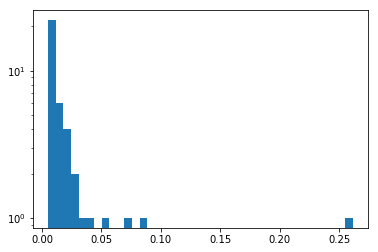

In [318]:
%matplotlib inline
plt.hist(pca.explained_variance_ratio_, bins=n_components, log=True)

In [319]:
import pandas as pd
pca.explained_variance_ratio_.sum()

0.95073380151022924

In [320]:
labels= pd.DataFrame(y)
value= pd.DataFrame(X_train)

from sklearn.decomposition import PCA
n_components = 100

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(value)


pca_result = pca.transform(X_train)

print(value.shape)
print(pca_result.shape)

(53, 50000)
(53, 53)


In [321]:
value.head()

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,171.0,171.0,172.0,169.0,159.0,141.0,120.0,105.0,96.0,96.0,...,50.0,52.0,49.0,48.0,54.0,64.0,133.0,206.0,219.0,227.0
1,44.0,38.0,43.0,47.0,42.0,44.0,49.0,46.0,38.0,17.0,...,15.0,15.0,14.0,13.0,12.0,13.0,18.0,18.0,18.0,18.0
2,255.0,253.0,252.0,254.0,255.0,255.0,253.0,246.0,253.0,255.0,...,182.0,171.0,152.0,154.0,173.0,184.0,177.0,173.0,164.0,153.0
3,28.0,27.0,27.0,26.0,25.0,24.0,24.0,24.0,23.0,22.0,...,197.0,195.0,194.0,193.0,189.0,186.0,189.0,190.0,191.0,192.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,16.0,16.0,16.0,16.0,15.0,15.0,16.0,16.0,18.0,20.0


# KNN, SVM and KMeans algorithms used to classify images

In [322]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
kmeans = KMeans(n_clusters=3)

ksv= kmeans.fit(value, labels) #kmeans



In [323]:
tsv= SVC(kernel='rbf').fit(value, labels) # svm

C:\Users\sam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [324]:
knn= KNeighborsClassifier() #knn
knn.fit(value, labels)


C:\Users\sam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [325]:
tt= np.loadtxt('./img/test_x.txt')
value2= pd.DataFrame(tt)
value2.head()

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,125.0,28.0,25.0,25.0,30.0,23.0,23.0,33.0,25.0,24.0,...,96.0,72.0,86.0,72.0,73.0,78.0,75.0,59.0,62.0,44.0
1,145.0,146.0,147.0,148.0,149.0,149.0,149.0,149.0,148.0,148.0,...,158.0,158.0,159.0,159.0,160.0,161.0,161.0,161.0,161.0,161.0
2,5.0,4.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,...,9.0,10.0,10.0,10.0,9.0,8.0,8.0,8.0,7.0,7.0
3,4.0,3.0,3.0,2.0,2.0,3.0,3.0,4.0,5.0,4.0,...,207.0,207.0,207.0,207.0,207.0,207.0,206.0,206.0,206.0,206.0
4,177.0,170.0,182.0,86.0,77.0,81.0,67.0,68.0,72.0,73.0,...,130.0,175.0,91.0,85.0,73.0,112.0,94.0,101.0,103.0,96.0


In [326]:
knn.predict(value2)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=uint8)

In [327]:
ksv.predict(value2)

array([2, 1, 0, 0, 2, 0, 0, 2, 2, 2])

In [328]:
tsv.predict(value2)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [329]:
from sklearn.metrics import precision_score

In [330]:
#print("accuracy"+ str(roc_auc_score(value2, tsv.predict(value2))))

In [331]:
from sklearn.model_selection import train_test_split

In [332]:
pca_result = data

In [333]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2,
random_state=0)

In [334]:
knn = KNeighborsClassifier(n_neighbors=1)
model= knn.fit(X_train, y_train)

In [335]:
predictions= knn.predict(X_test)

In [336]:
print (model.score(X_test, y_test))

0.272727272727


In [337]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [338]:
Kmeans_model= kmeans.fit(X_train, y_test)

In [339]:
predictions= kmeans.predict(X_test)

In [340]:
print(Kmeans_model.score(X_test, y_test))

-2483701112.3


In [341]:
from sklearn import svm
svm= svm.SVC(kernel='linear', C=1)


In [342]:
svm_model= svm.fit(X_train, y_train)

In [343]:
predictions= svm.predict(X_test)

In [344]:
print(svm_model.score(X_test, y_test))

0.454545454545


In [345]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics    

In [346]:
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("knn")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

knn
Accuracy: 0.44 (+/- 0.27)


In [347]:
scores = cross_val_score(kmeans, X_train, y_train, cv=5, scoring='accuracy')
print("kmeans")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

kmeans
Accuracy: 0.24 (+/- 0.16)


In [348]:
scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print("svm")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

svm
Accuracy: 0.47 (+/- 0.17)


# cv scores of svm

In [349]:
scores


array([ 0.5       ,  0.44444444,  0.375     ,  0.625     ,  0.42857143])

# Accuracy scores

knn = 0.44 svm = 0.47   kmeans = 0.24

# Trying autoML procedure

In [350]:
""""
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, n_jobs=-1, cv= 5)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Best pipeline: GaussianNB(LogisticRegression(input_matrix, C=0.1, dual=False, penalty=l1))
0.363636363636

No significant improvement on this dataset
"""


'"\nfrom tpot import TPOTClassifier\ntpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, n_jobs=-1, cv= 5)\ntpot.fit(X_train, y_train)\nprint(tpot.score(X_test, y_test))\n\nBest pipeline: GaussianNB(LogisticRegression(input_matrix, C=0.1, dual=False, penalty=l1))\n0.363636363636\n'

The generated pipeline from the autoML does not have a better accuracy than our best performing SVM classifier.

Improvements can be made by using Convolutional Neural Networks, increasing the training data or by creating an 
ensemble of algorithms.
  

# Ensemble of knn, kmeans and svm by stacking

In [351]:
import mlxtend
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[kmeans, svm, knn], 
                          meta_classifier=lr)

In [352]:
print('5-fold cross validation:\n')

for clf, label in zip([kmeans, svm, knn, sclf], 
                      ['kmeans', 
                       'svm', 
                       'knn',
                       'StackingClassifier']):
    
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))


5-fold cross validation:

Accuracy: 0.36 (+/- 0.11) [kmeans]
Accuracy: 0.47 (+/- 0.09) [svm]
Accuracy: 0.44 (+/- 0.13) [knn]
Accuracy: 0.53 (+/- 0.03) [StackingClassifier]


By stacking the classifiers, we are able to improve the overall accuracy to 0.53